# 🔹 Sabriya Sowers' Wine Data Analysis 🔹

**Author:** Sabriya Sowers  
**Date:** October 31, 2025  

## Introduction

## Section 1. Import and Inspect the Data

In [ ]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.datasets import load_wine
import pandas as pd

In [ ]:
# Load the Wine dataset from sklearn
wine_data = load_wine()

# Convert the dataset’s feature data (numeric values only) into a pandas DataFrame
wine = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)

# Add the 'target' column to represent the wine class (0, 1, or 2)
wine['target'] = wine_data.target

In [7]:
# Displays basic dataset info
wine.info()
wine.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [16]:
# Rename columns that have difficult to underatand names
wine = wine.rename(columns={
    'hue': 'color_hue',
    'od280/od315_of_diluted_wines': 'phenolic_ratio'
})

# Display first 10 rows
print(wine.head(10))

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   
5    14.20        1.76  2.45               15.2      112.0           3.27   
6    14.39        1.87  2.45               14.6       96.0           2.50   
7    14.06        2.15  2.61               17.6      121.0           2.60   
8    14.83        1.64  2.17               14.0       97.0           2.80   
9    13.86        1.35  2.27               16.0       98.0           2.98   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity  \
0        3.06                  0.28             2.29             5.64   
1     

In [18]:
# Check for missing values
wine.isnull().sum()

alcohol                 0
malic_acid              0
ash                     0
alcalinity_of_ash       0
magnesium               0
total_phenols           0
flavanoids              0
nonflavanoid_phenols    0
proanthocyanins         0
color_intensity         0
color_hue               0
phenolic_ratio          0
proline                 0
target                  0
dtype: int64

In [19]:
# Display summary statistics
print(wine.describe())

          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.9

In [20]:
# Check for correlations
print(wine.corr(numeric_only=True))

                       alcohol  malic_acid       ash  alcalinity_of_ash  \
alcohol               1.000000    0.094397  0.211545          -0.310235   
malic_acid            0.094397    1.000000  0.164045           0.288500   
ash                   0.211545    0.164045  1.000000           0.443367   
alcalinity_of_ash    -0.310235    0.288500  0.443367           1.000000   
magnesium             0.270798   -0.054575  0.286587          -0.083333   
total_phenols         0.289101   -0.335167  0.128980          -0.321113   
flavanoids            0.236815   -0.411007  0.115077          -0.351370   
nonflavanoid_phenols -0.155929    0.292977  0.186230           0.361922   
proanthocyanins       0.136698   -0.220746  0.009652          -0.197327   
color_intensity       0.546364    0.248985  0.258887           0.018732   
color_hue            -0.071747   -0.561296 -0.074667          -0.273955   
phenolic_ratio        0.072343   -0.368710  0.003911          -0.276769   
proline               0.6

In [30]:
print("Minimum:", wine['alcohol'].min())
print("Median:", wine['alcohol'].median())
print("Maximum:", wine['alcohol'].max())

Minimum: 11.03
Median: 13.05
Maximum: 14.83


### Reflection 1

**1. How many data instances are there?**  
178

**2. How many features are there?**  
14

**3. What are the names?**  
alcohol, malic_acid, ash, alcalinity_of_ash, magnesium, total_phenols, flavanoids, nonflavanoid_phenols, proanthocyanins, color_intensity, hue, od280/od315_of_diluted_wines, proline, and target.

**4. Are there any missing values?**  
No

**5. Are there any non-numeric features?**  
No. All features are either float64 or int64.

**6. Are the data instances sorted on any of the attributes?**  
No

**7. What are the minimum, median, and maximum?**  
- Minimum: 11.03
- Median: 13.05
- Maximum: 14.83

**8. What two different features have the highest correlation?**  
 The two features with the highest correlation are flavanoids and total_phenols, with a strong positive relationship (around 0.86). This means that as total phenols increase, flavanoids tend to increase as well which makes sense because both are related to the wine’s chemical composition and quality.

**10. Are there any categorical features that might be useful for prediction?**  
No because there are no categorical features in this dataset.

### 2.1 Explore Data Patterns and Distributions

### Scatter Matrix: Alcohol, Color Intensity, Proline

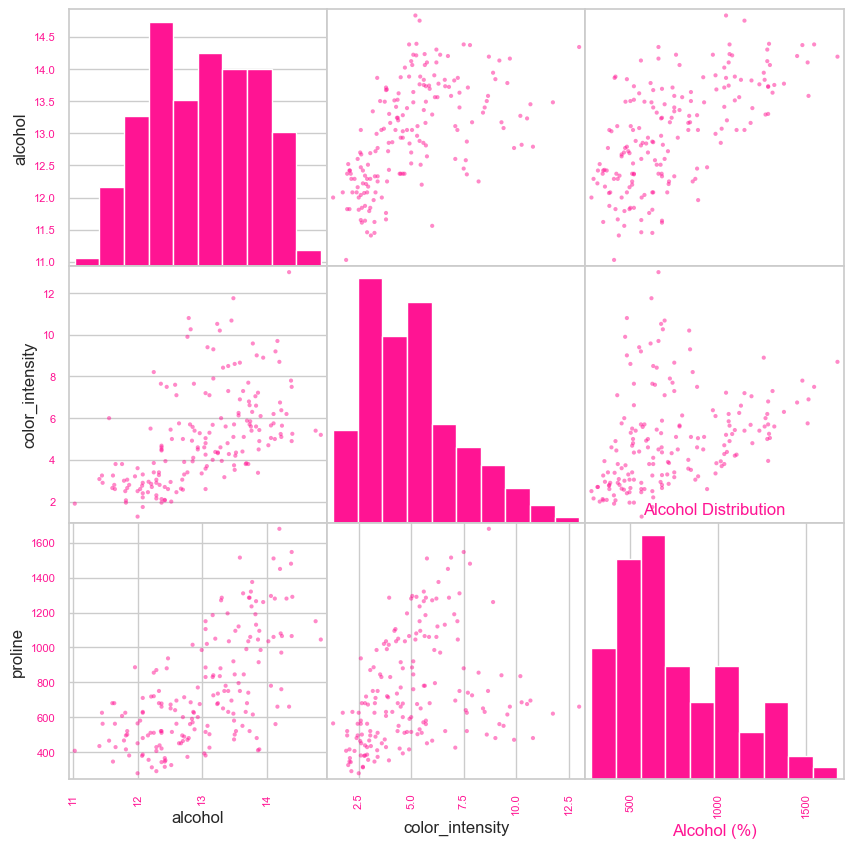

In [ ]:
attributes = ['alcohol', 'color_intensity', 'proline']
scatter_matrix(wine[attributes], figsize=(10, 10))

# Set general pink theme
sns.set_theme(style="whitegrid", palette=["#FF1493"])
plt.rcParams['xtick.color'] = '#FF1493'
plt.rcParams['ytick.color'] = '#FF1493'
plt.rcParams['axes.titlecolor'] = '#FF1493'

### Create a scatter plot of age vs fare, colored by gender

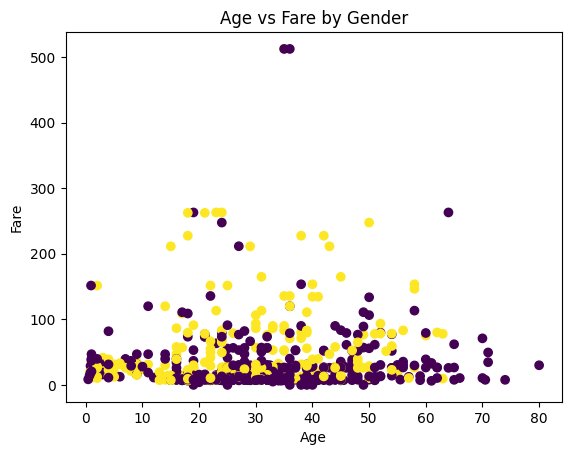

In [94]:
plt.scatter(titanic['age'], titanic['fare'], c=titanic['sex'].apply(lambda x: 0 if x == 'male' else 1))
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare by Gender')
plt.show()

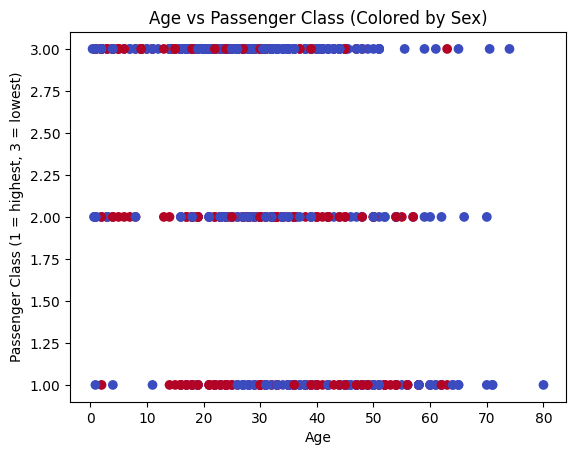

In [95]:
colors = titanic['sex'].apply(lambda x: 0 if x == 'male' else 1)
plt.scatter(titanic['age'], titanic['pclass'], c=colors, cmap='coolwarm')
plt.xlabel('Age')
plt.ylabel('Passenger Class (1 = highest, 3 = lowest)')
plt.title('Age vs Passenger Class (Colored by Sex)')
plt.show()


### Histogram Of Age

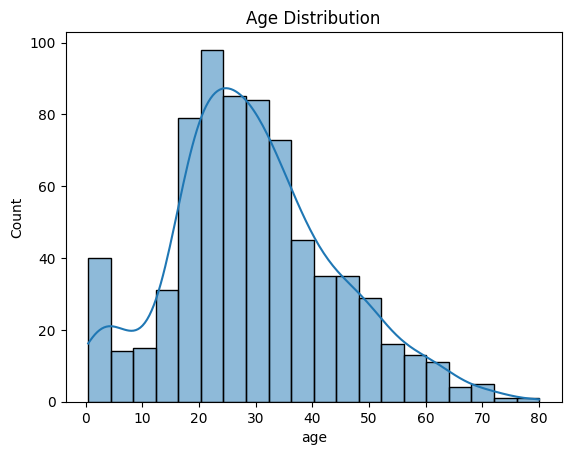

In [96]:
sns.histplot(titanic['age'], kde=True)
plt.title('Age Distribution')
plt.show()

### Create a count plot for class and survival

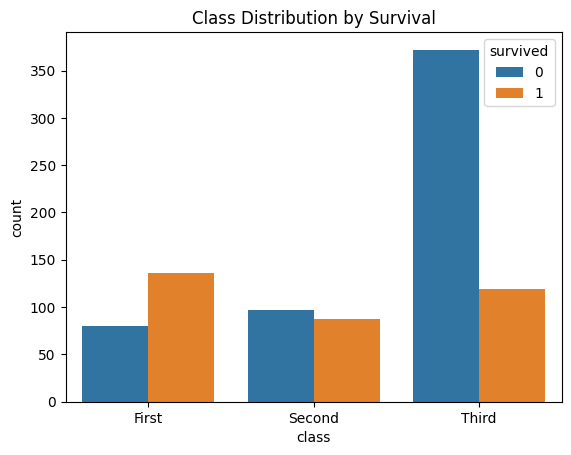

In [97]:
sns.countplot(x='class', hue='survived', data=titanic)
plt.title('Class Distribution by Survival')
plt.show()

### Reflection 2.1

**1. What patterns or anomalies do you notice?**  
- The scatter plots show that passengers from all age groups paid a wide range of fares, but most fares were low. Younger passengers are concentrated in lower fare ranges.  
- In the “Age vs Passenger Class” plot, most people traveled in 3rd class — especially younger adults and children.  
- The “Class Distribution by Survival” plot shows that 1st class passengers had much higher survival rates than those in 3rd class.  

**2. Do any features stand out as potential predictors?**  
Yes. Passenger class, sex, and age stand out as strong predictors of survival.  
The visual patterns show that being in a higher class and being female were associated with better survival outcomes.  

**3. Are there any visible class imbalances?**  
Yes. There are more 3rd class passengers compared to 1st or 2nd class.  
This imbalance may affect model training since the survival rate in 3rd class is much lower, which could skew the model toward predicting non-survival.

### 2.2 Handle Missing Values and Clean Data

In [ ]:
# Fill missing values in the Titanic dataset
titanic['age'] = titanic['age'].fillna(titanic['age'].median())

titanic['embark_town'] = titanic['embark_town'].fillna(
    titanic['embark_town'].mode()[0]
)

In [98]:
# Creating / modifying columns in the DataFrame. When ran in this cell work happens behind the scenes.
# Create a new feature: Family size
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

#Convert categorical data to numeric:
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

#Create a binary feature for 'alone':
titanic['alone'] = titanic['alone'].astype(int)

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family_size
0,0,3,0,22.0,1,0,7.2500,2.0,Third,man,True,NaN,Southampton,no,0,2
1,1,1,1,38.0,1,0,71.2833,0.0,First,woman,False,C,Cherbourg,yes,0,2
2,1,3,1,26.0,0,0,7.9250,2.0,Third,woman,False,NaN,Southampton,yes,1,1
3,1,1,1,35.0,1,0,53.1000,2.0,First,woman,False,C,Southampton,yes,0,2
4,0,3,0,35.0,0,0,8.0500,2.0,Third,man,True,NaN,Southampton,no,1,1


### Reflection 2.3

1. **Why might family size be a useful feature for predicting survival?** 
Family size can indicate whether a passenger was traveling alone or with others, which likely affected their chances of survival. People traveling with family members may have helped each other find lifeboats or stay together during the evacuation, while those alone might have had fewer opportunities for help.
   
2. **Why convert categorical data to numeric?**
Most machine learning models can only work with numbers, not words. Turning categories like sex or embarked into numbers lets the model understand and use that information when learning patterns in the data.

## Section 3. Feature Selection and Justification

### 3.1 Choose Features and Target
For this classification task, the goal is to predict whether a passenger **survived** the Titanic disaster.  

### Target Variable (y)
**`survived`** — indicates if the passenger lived (`1`) or did not survive (`0`).

### Input Features (X)
  **`age`** older passengers may have had lower survival rates.  
- **`fare`** higher fares often indicate higher-class cabins with better access to lifeboats.  
- **`pclass`** passenger class (1st, 2nd, or 3rd) reflects socioeconomic status and survival likelihood.  
- **`sex`** gender played a major role due to the "women and children first" policy.  
- **`family_size`** passengers traveling with family may have influenced each other's survival chances.  

### Justification
These features combine both **demographic** (`age`, `sex`, `family_size`) and **socioeconomic** (`fare`, `pclass`) factors that strongly influenced survival outcomes, making them useful predictors for this classification model.

### 3.2 Define Features (X) and Target (y)
The selected input features and target variable are defined below.  
`X` contains the predictors, and `y` contains the outcome we want to predict.

X = titanic[['age', 'fare', 'pclass', 'sex', 'family_size']]
y = titanic['survived']

### Reflection 3
1. **Why are these features selected?**  
   These features were chosen because they represent key factors that may influence survival on the Titanic.  
   - **Age** and **sex** capture demographic differences that affected who may have received help first.  
   - **Fare** and **pclass** reflect socioeconomic status and easy access to lifeboats.  
   - **Family size** helps show whether traveling alone or with others can affect survival chances.

2. **Are there any features that are likely to be highly predictive of survival?** Yes. 
   **Sex** and **pclass** are likely to be the most predictive. Women and passengers in higher classes had much better survival rates due to social and easier access to evacuation methods.

## Section 4. Splitting
Comparing the difference between the training and test sets using train_test_split first and StratifiedShuffleSplit second.

### Basic Train/Test split
Randomly splits 80% of the rows into training and 20% into test.

In [99]:
# Split the data into training and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123
)

# Display dataset sizes
print('Train size:', len(X_train))
print('Test size:', len(X_test))

Train size: 712
Test size: 179


### Stratified Train/Test split
Randomly splits 80% of the data into a training set and 20% into a test set, **while keeping the same proportion of the target variable (`survived`) in both sets**. This ensures that the survival ratio remains consistent between training and test data, leading to a more reliable model evaluation.

In [100]:
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X, y):
    train_set = X.iloc[train_indices]
    test_set = X.iloc[test_indices]

print('Train size:', len(train_set))
print('Test size:', len(test_set))

Train size: 712
Test size: 179


### Compare Results

In [101]:
print("Original Class Distribution:\n", y.value_counts(normalize=True))
print("Train Set Class Distribution:\n", train_set['pclass'].value_counts(normalize=True))
print("Test Set Class Distribution:\n", test_set['pclass'].value_counts(normalize=True))

Original Class Distribution:
 survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64
Train Set Class Distribution:
 pclass
3    0.561798
1    0.227528
2    0.210674
Name: proportion, dtype: float64
Test Set Class Distribution:
 pclass
3    0.508380
1    0.301676
2    0.189944
Name: proportion, dtype: float64


### Reflection 4
1. **Why might stratification improve model performance?**  
   Stratification helps keep the same balance of people who survived and didn’t survive in both the training and test sets. This makes the model more accurate since both sets represent the data fairly.

2. **How close are the training and test distributions to the original dataset?**  
   They are pretty close. Around 62% didn’t survive and 38% did, and the training and test sets have about the same numbers.

3. **Which split method produced better class balance?**  
   The stratified split worked better because it kept the same survival ratio in both sets, while the regular split might not always do that.